In [1]:
import collections
import functions
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
from datetime import datetime as dt

In [2]:
days = [
    dt(year=2016, month=3, day=1),
    dt(year=2016, month=3, day=8),
    dt(year=2016, month=3, day=15),
    dt(year=2016, month=3, day=22),
    dt(year=2016, month=3, day=29)
]
for day in days:
    functions.analyze_trips_by_moments_week_station(day, station=27, intervalo=10)

Leyendo datos de la semana 2016-03-01 00:00:00 estación 27
Leyendo datos de la semana 2016-03-08 00:00:00 estación 27
Leyendo datos de la semana 2016-03-15 00:00:00 estación 27
Leyendo datos de la semana 2016-03-22 00:00:00 estación 27
Leyendo datos de la semana 2016-03-29 00:00:00 estación 27


In [2]:
files = [
    './data/trips_2016-03-01_station_27.json',
    './data/trips_2016-03-08_station_27.json',
    './data/trips_2016-03-15_station_27.json',
    './data/trips_2016-03-22_station_27.json',
    './data/trips_2016-03-29_station_27.json'
]
lines = {}
for file in files:
    data = json.load(open(file))
    ordered_data = collections.OrderedDict(sorted(data.items()))
    acum = 0
    points = []
    for k, v in ordered_data.items():
        points.append(acum)
        acum += v['llegadas'] - v['salidas']
    lines[file[13:23]] = points

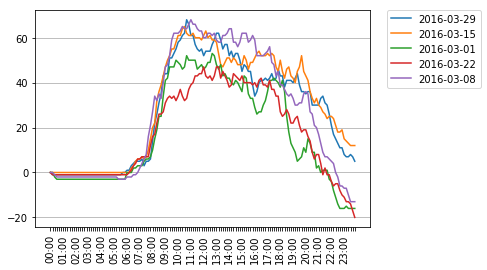

In [13]:
for k, v in lines.items():
    plt.plot(v, label=k)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.axes()        
ax.yaxis.grid()
# ax.xaxis.grid()
ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
plt.xticks(range(len(ordered_data)), [k if i % 6 == 0 else '' for i, k in enumerate(ordered_data.keys())], rotation='vertical')
plt.savefig('./data/viajes martes marzo 2016.png')
plt.show()

In [6]:
files = [
    './data/trips_week_2016-03-29_station_27.json',
    './data/trips_week_2016-03-22_station_27.json',
    './data/trips_week_2016-03-15_station_27.json',
    './data/trips_week_2016-03-08_station_27.json',
    './data/trips_week_2016-03-01_station_27.json'
]
lines = {}
for file in files:
    data = json.load(open(file))
    acum = 0
    points = []
    for day in data:
        ordered_data = collections.OrderedDict(sorted(data[day].items()))
        for k, v in ordered_data.items():
            points.append(acum)
            acum += v['llegadas'] - v['salidas']
    lines[file[18:28]] = points

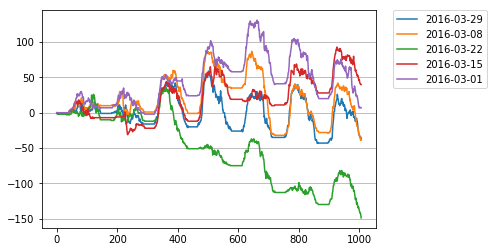

In [9]:
for k, v in lines.items():
    plt.plot(v, label=k)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.axes()        
ax.yaxis.grid()
# ax.xaxis.grid()
# ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
# plt.xticks(range(len(ordered_data)), [k if i % 6 == 0 else '' for i, k in enumerate(ordered_data.keys())], rotation='vertical')
plt.savefig('./data/viajes semana completa martes marzo 2016.png')
plt.show()